In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
exp_full = pd.read_csv('../experiments/Altruism_RMAI experiment-table-run-2.csv', skiprows=[0, 1, 2, 3, 4, 5])
step_col = exp_full.pop("[step]")
exp_full.insert(1, "step", step_col)
exp_full = exp_full.rename(columns={"[run number]": "run-number"}).sort_values(by=['run-number', 'step'])


#### Check summary statistics

In [3]:
COLS_TO_OMIT = ['run-number', 'step', 'count altruism-agents', 'count greedy-agents']

summary = exp_full.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
run-number,3291717.0,16327.853071,9451.748526,1.00,8148.00,16296.0,24490.0,32805.0
step,3291717.0,49.942034,29.165334,0.00,25.00,50.0,75.0,100.0
occupation-var,3291717.0,0.497377,0.326052,0.10,0.10,0.5,0.9,0.9
reproduction-var,3291717.0,0.500286,0.326581,0.10,0.10,0.5,0.9,0.9
initial-patch-harshness,3291717.0,24.901723,16.323003,5.00,5.00,25.0,45.0,45.0
prob-gain-resource,3291717.0,0.400018,0.163308,0.20,0.20,0.4,0.6,0.6
stride-length,3291717.0,0.136583,0.121199,0.01,0.01,0.1,0.3,0.3
agent-move-cost,3291717.0,9.998554,4.081523,5.00,5.00,10.0,15.0,15.0
energy-gain,3291717.0,58.339903,31.176714,25.00,25.00,50.0,100.0,100.0
altruism-resource-threshold,3291717.0,49.960829,24.503117,20.00,20.00,50.0,80.0,80.0


#### Plot 3 x 5 random experiments (each plot contains runs with the same variables)

In [4]:
def plot_random_experiment(exp_full: pd.DataFrame, n=3):
    variables = [col for col in exp_full.columns if col not in COLS_TO_OMIT]
    unique_combinations = exp_full.drop_duplicates(subset=variables)[variables]
    selected_combinations = unique_combinations.sample(3)
    
    for index, row in selected_combinations.iterrows():
        filtered_exp_full = exp_full[(exp_full[variables] == row).all(axis=1)]
        run_numbers = filtered_exp_full['run-number'].unique().tolist()
        selected_combinations_dict = selected_combinations.to_dict()
        plt.figure(figsize=(10, 6))
        for run_number in run_numbers:
            filtered_exp_run = filtered_exp_full[(filtered_exp_full['run-number'] == run_number)]
            sns.lineplot(data=filtered_exp_run, x='step', y='count altruism-agents', label='Altruists', color='blue')
            sns.lineplot(data=filtered_exp_run, x='step', y='count greedy-agents', label='Greedy', color='red' )
            plt.fill_between(filtered_exp_run['step'], filtered_exp_run['count altruism-agents'], alpha=0.1, color='blue')
            plt.fill_between(filtered_exp_run['step'], filtered_exp_run['count greedy-agents'], alpha=0.1, color='red')
    
        plt.title('Run numbers: ' + str(run_numbers)) 
        plt.figtext(1, 0.5, row)
        plt.ylabel('Count')
        plt.xlabel('Step')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), title='Agent Type')
        plt.tight_layout()

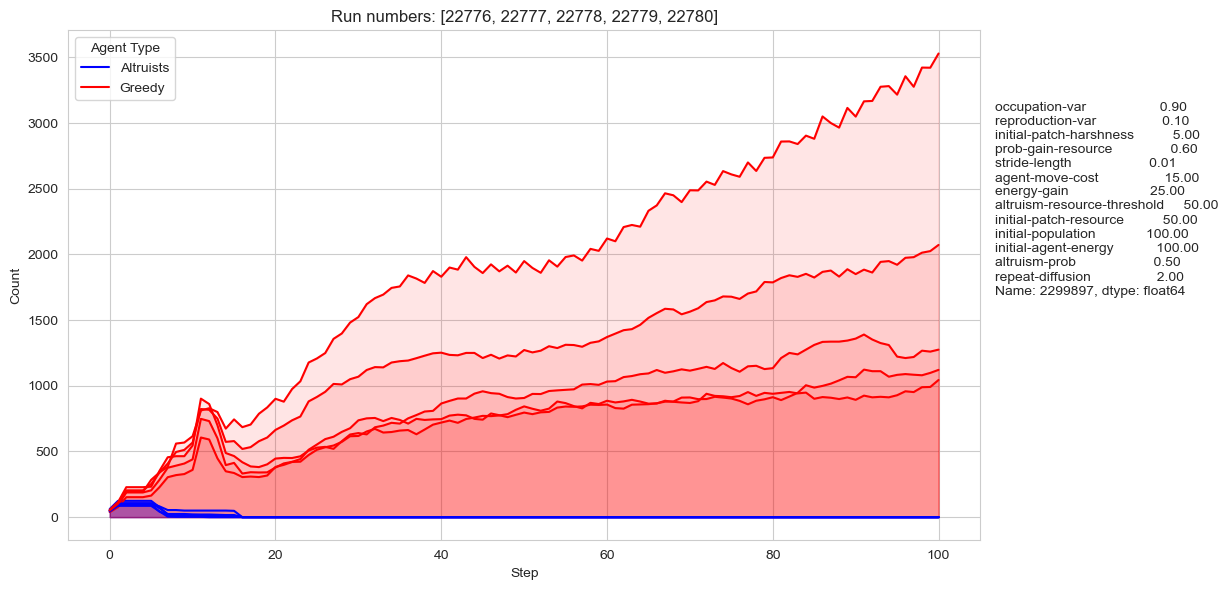

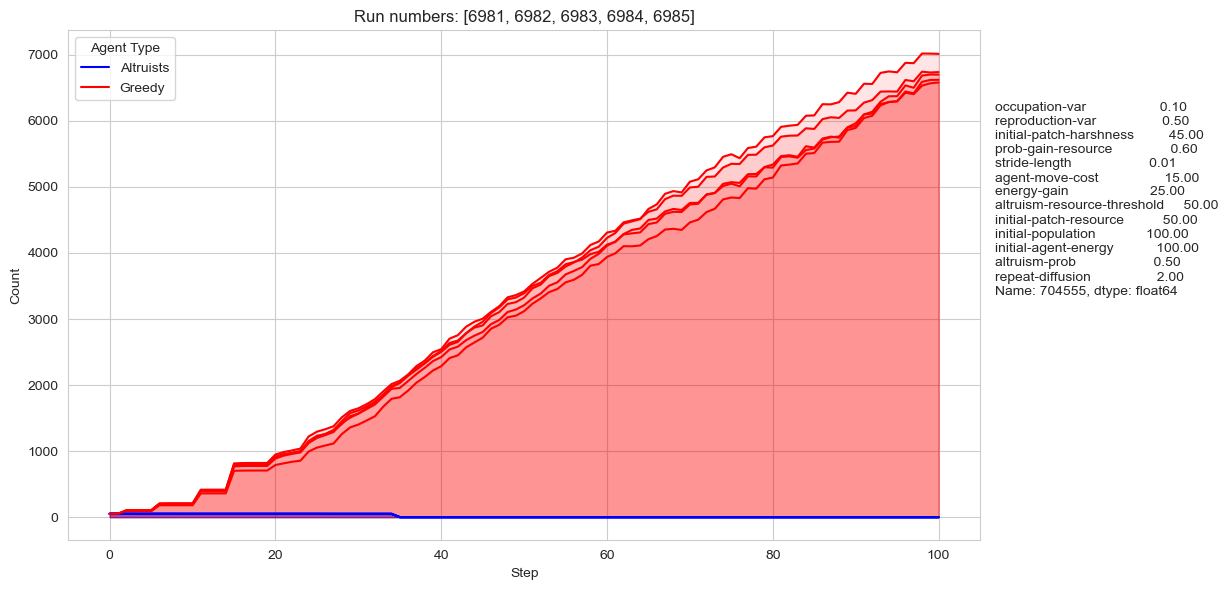

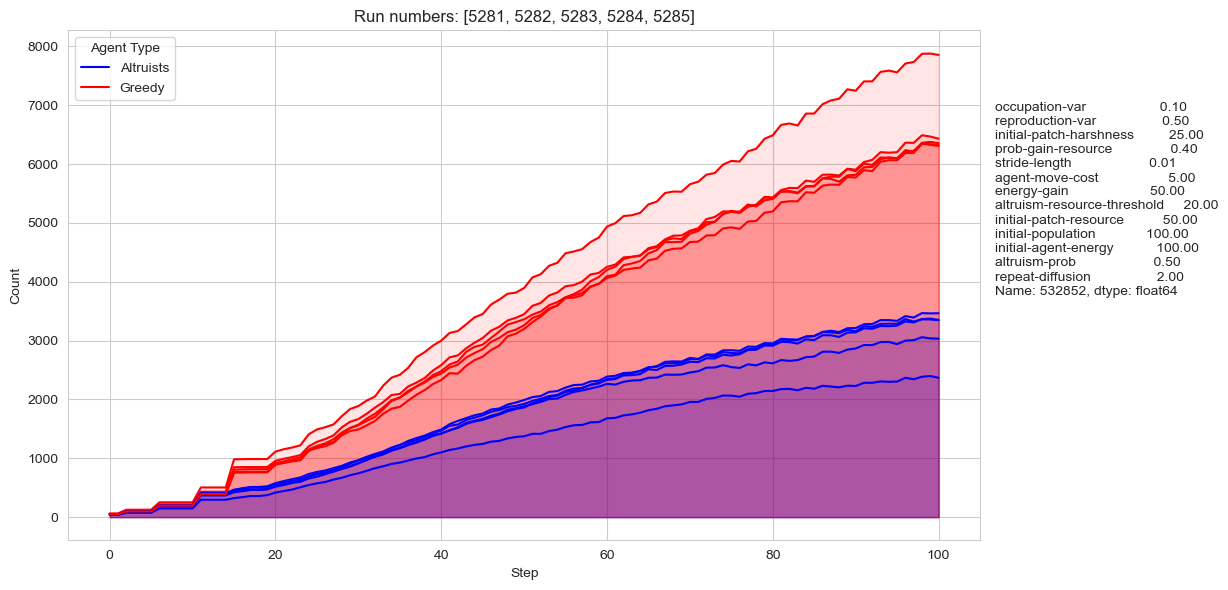

In [5]:
plot_random_experiment(exp_full)

}#### Filter down to end states

In [6]:
exp = exp_full[exp_full["step"] == exp_full.groupby(['run-number'])['step'].transform('max')]

#### Find runs that finished early

In [7]:
exp

,run-number,step,occupation-var,reproduction-var,initial-patch-harshness,prob-gain-resource,stride-length,agent-move-cost,energy-gain,altruism-resource-threshold,initial-patch-resource,initial-population,initial-agent-energy,altruism-prob,repeat-diffusion,count altruism-agents,count greedy-agents
1091,1,100,0.1,0.1,5,0.2,0.01,5,25,20,50,100,100,0.5,2,2680,5345
1053,2,100,0.1,0.1,5,0.2,0.01,5,25,20,50,100,100,0.5,2,2384,5717
1076,3,100,0.1,0.1,5,0.2,0.01,5,25,20,50,100,100,0.5,2,2877,5212
1080,4,100,0.1,0.1,5,0.2,0.01,5,25,20,50,100,100,0.5,2,2586,5147
1024,5,100,0.1,0.1,5,0.2,0.01,5,25,20,50,100,100,0.5,2,3048,4761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291633,32801,100,0.9,0.9,45,0.6,0.30,15,100,80,50,100,100,0.5,2,0,523
3291668,32802,100,0.9,0.9,45,0.6,0.30,15,100,80,50,100,100,0.5,2,0,905
3291682,32803,100,0.9,0.9,45,0.6,0.30,15,100,80,50,100,100,0.5,2,0,2270
3291689,32804,100,0.9,0.9,45,0.6,0.30,15,100,80,50,100,100,0.5,2,0,1371


In [8]:
exp_early_finish = exp[exp["step"] < 100]

Check the total count of the agents in the runs that finished early, looks like Behaviour Space does not persist the step where the number of agents hits zero, but ends on the step just before.

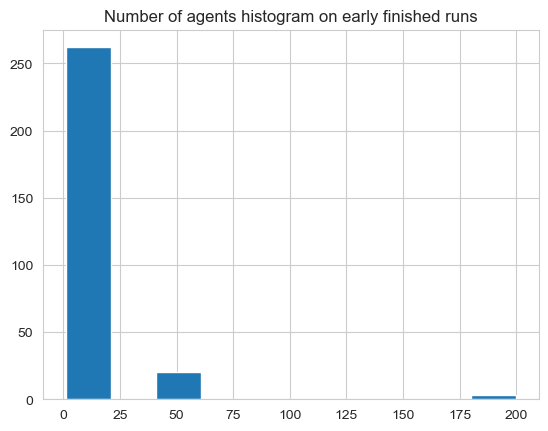

In [9]:

exp_early_finish[['count greedy-agents', 'count altruism-agents']].sum(axis=1).hist()
plt.title('Number of agents histogram on early finished runs')
plt.show()

#### We filter out the early finishers

In [10]:
exp = exp[exp['step'] == 100].drop(columns=['step'])

In [11]:
exp_full = exp_full[exp_full['run-number'].isin(exp['run-number'])]

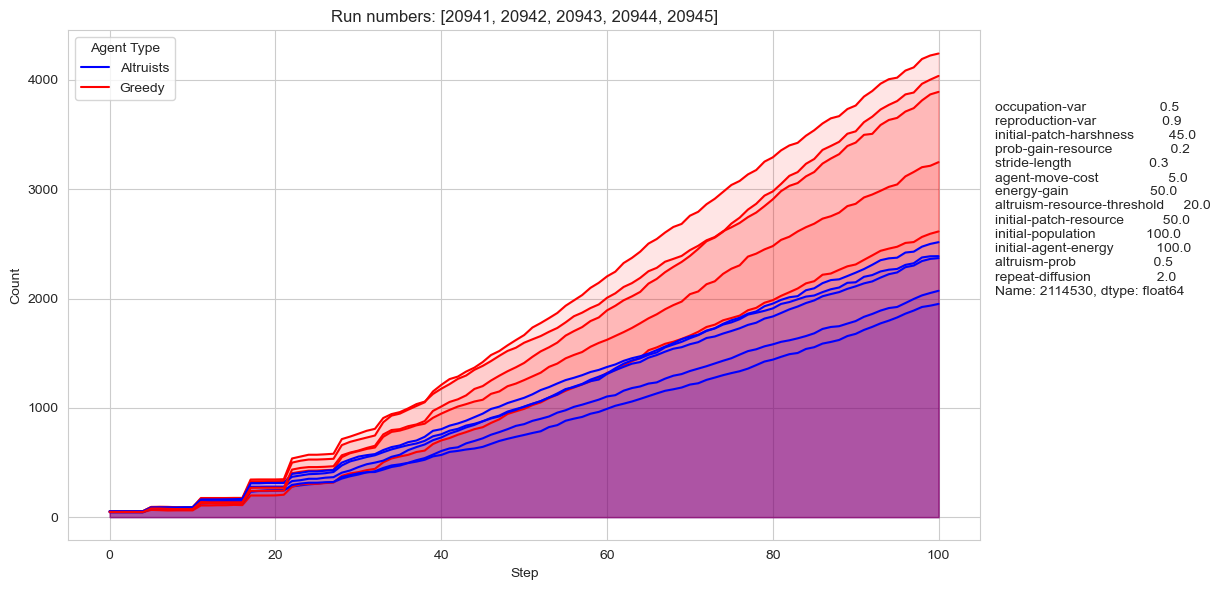

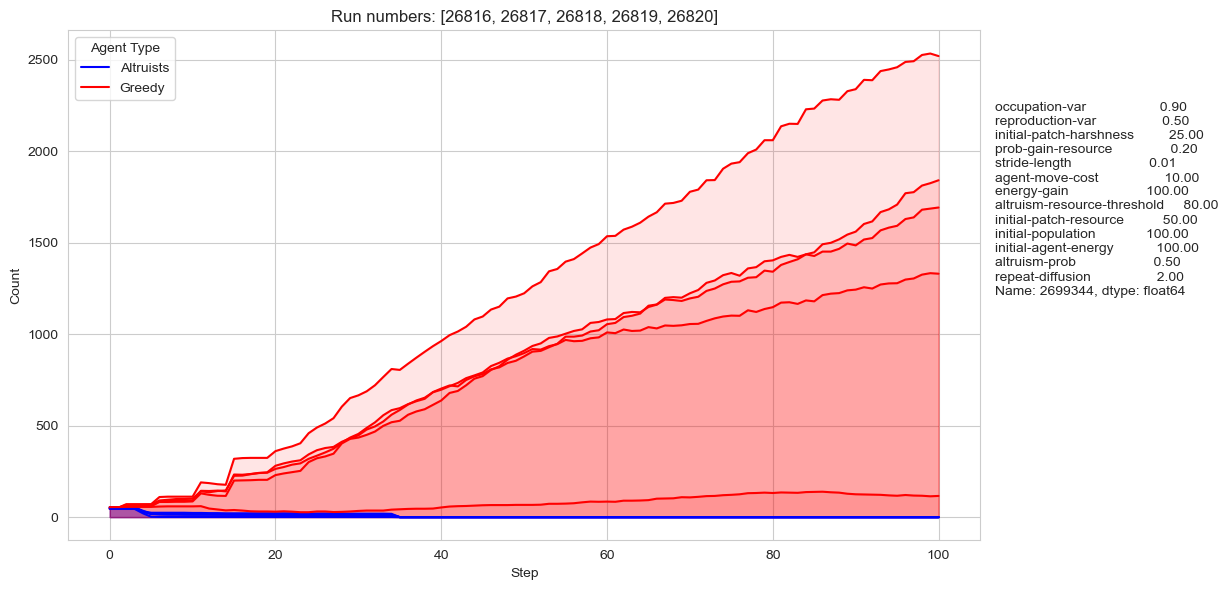

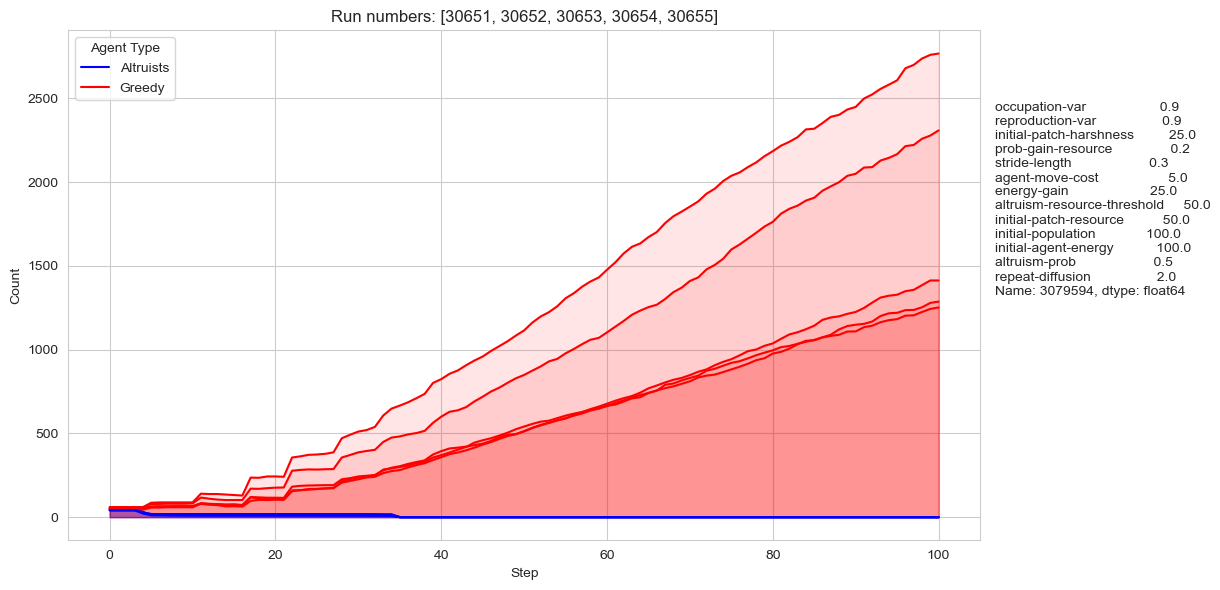

In [12]:
plot_random_experiment(exp_full)

### We look at the distributions of the varying inputs in different cases

In [13]:
varying_inputs = [i for i in summary.index if summary.loc[i]['min'] != summary.loc[i]['max'] and i not in COLS_TO_OMIT]
varying_inputs

['occupation-var',
 'reproduction-var',
 'initial-patch-harshness',
 'prob-gain-resource',
 'stride-length',
 'agent-move-cost',
 'energy-gain',
 'altruism-resource-threshold']

In [32]:
small_vars = ['occupation-var',
 'reproduction-var',
 'prob-gain-resource',
 'stride-length',
]
large_vars = [col for col in varying_inputs if col not in small_vars]
  
def box_plots(end_states_df, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    melted_small = end_states_df.melt(value_vars=small_vars, var_name='Variable', value_name='Value')
    melted_large = end_states_df.melt(value_vars=large_vars, var_name='Variable', value_name='Value')

    sns.stripplot(x='Variable', y='Value', data=melted_small, ax=axes[0], dodge=True, alpha=0.01, size=10)
    axes[0].set_title('Small Ranges')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Value')
    
    sns.stripplot(x='Variable', y='Value', data=melted_large, ax=axes[1],  dodge=True, alpha=0.01, size=10)
    axes[1].set_title('Large Ranges')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.figtext(0.5, 0, title)
    plt.show()
    

#### No altruists left

Number of runs with no Altruists: 21697


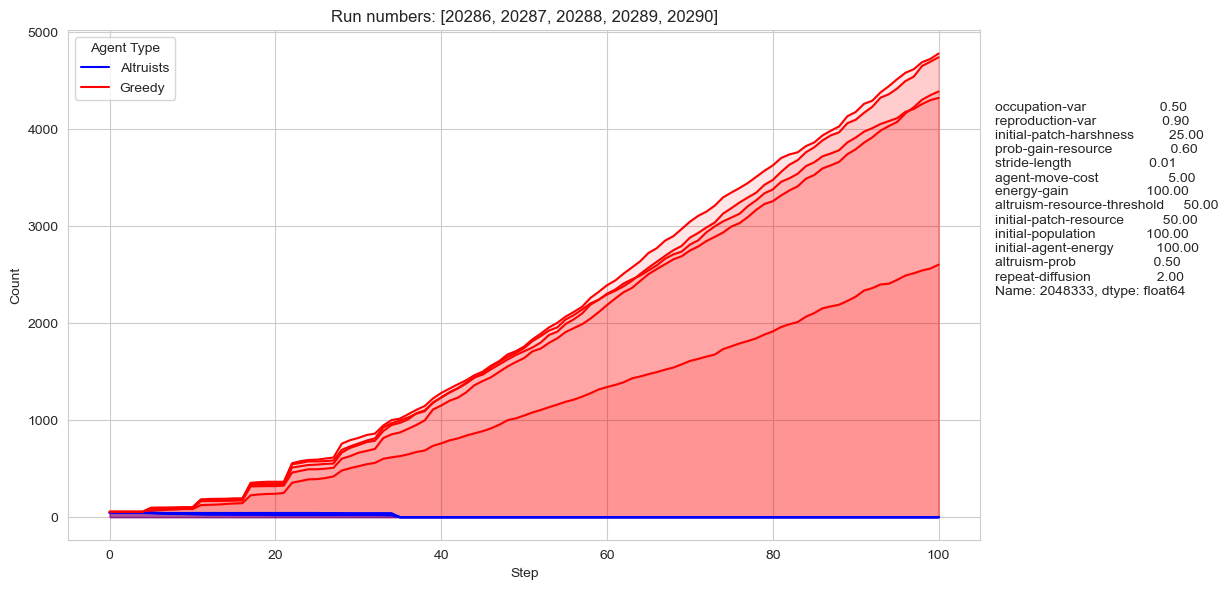

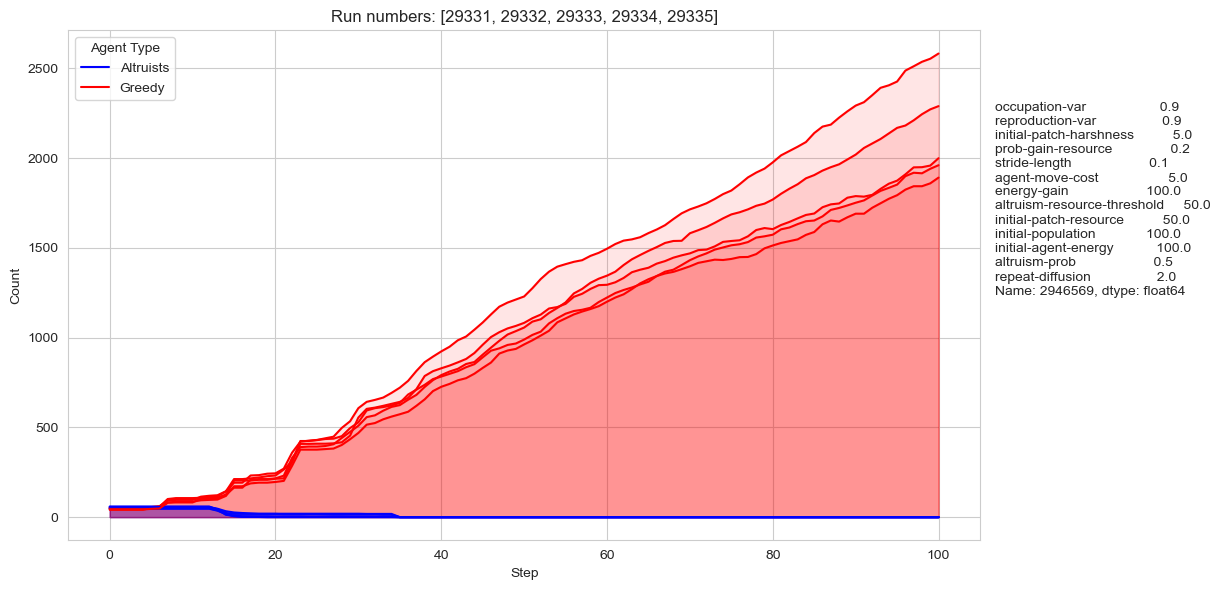

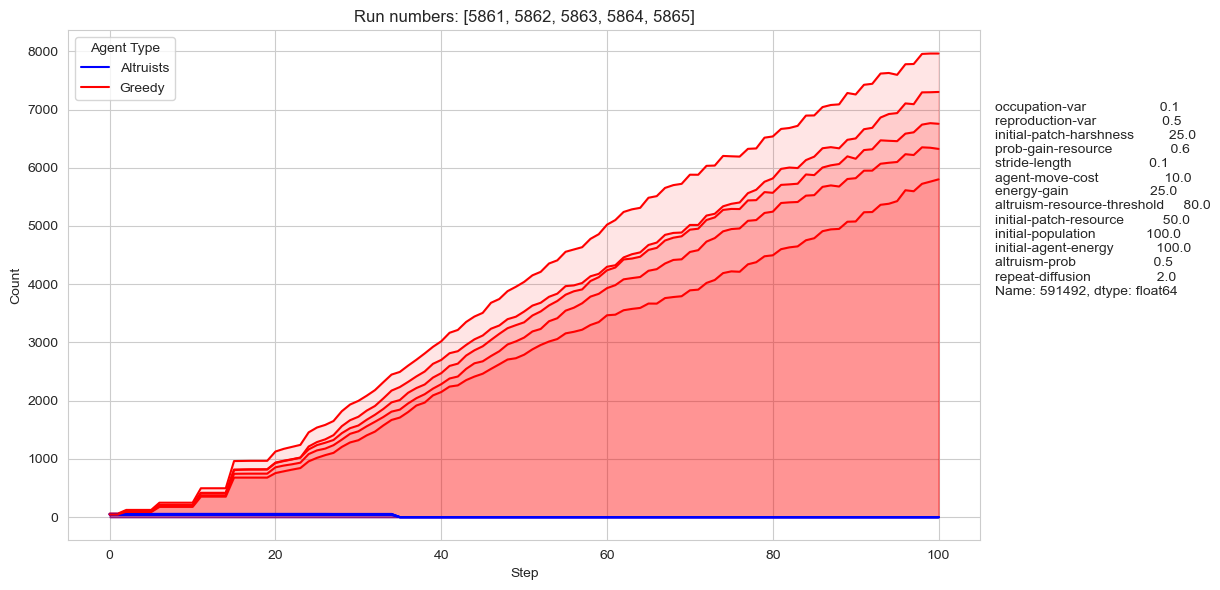

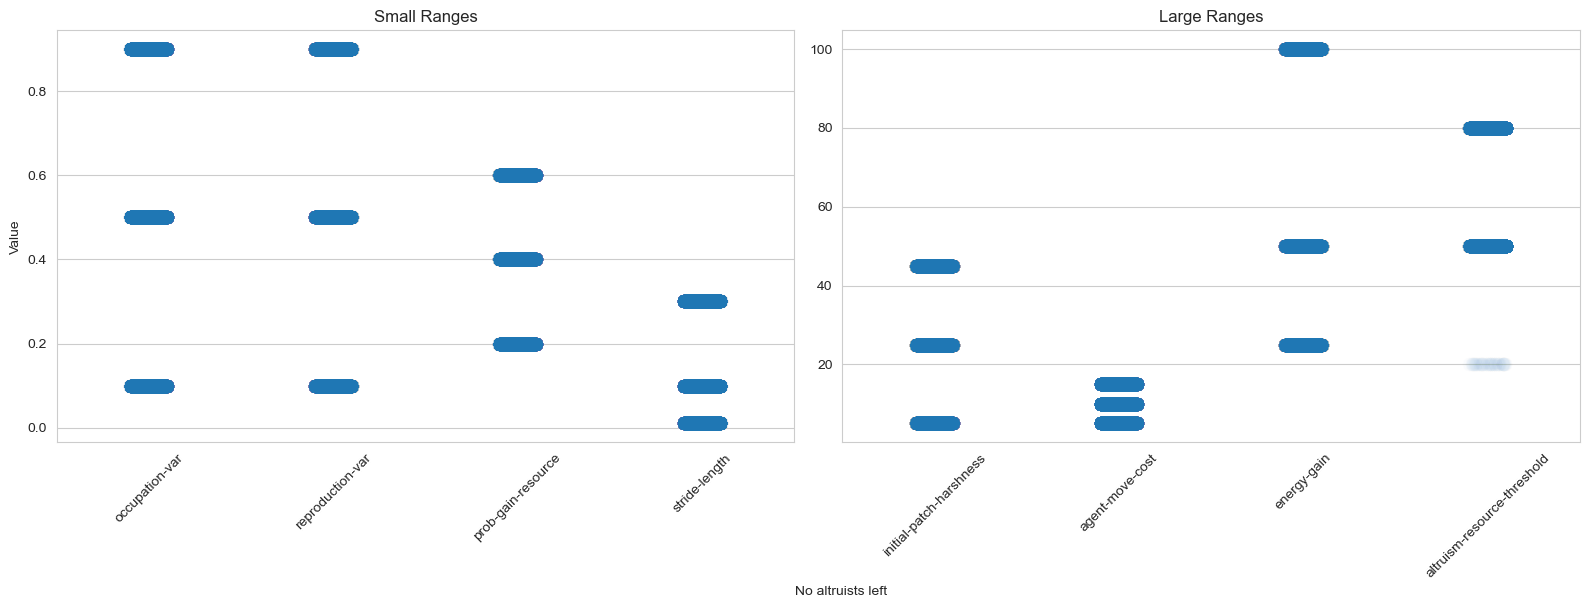

In [33]:
exp_no_altruists = exp[exp['count altruism-agents'] == 0]
exp_full_no_alruists = exp_full[exp_full['run-number'].isin(exp_no_altruists['run-number'])]
print('Number of runs with no Altruists:', len(exp_no_altruists))
plot_random_experiment(exp_full_no_alruists)
box_plots(exp_no_altruists, 'No altruists left')

#### No greedy agents left

Number of runs with no greedy agents 58


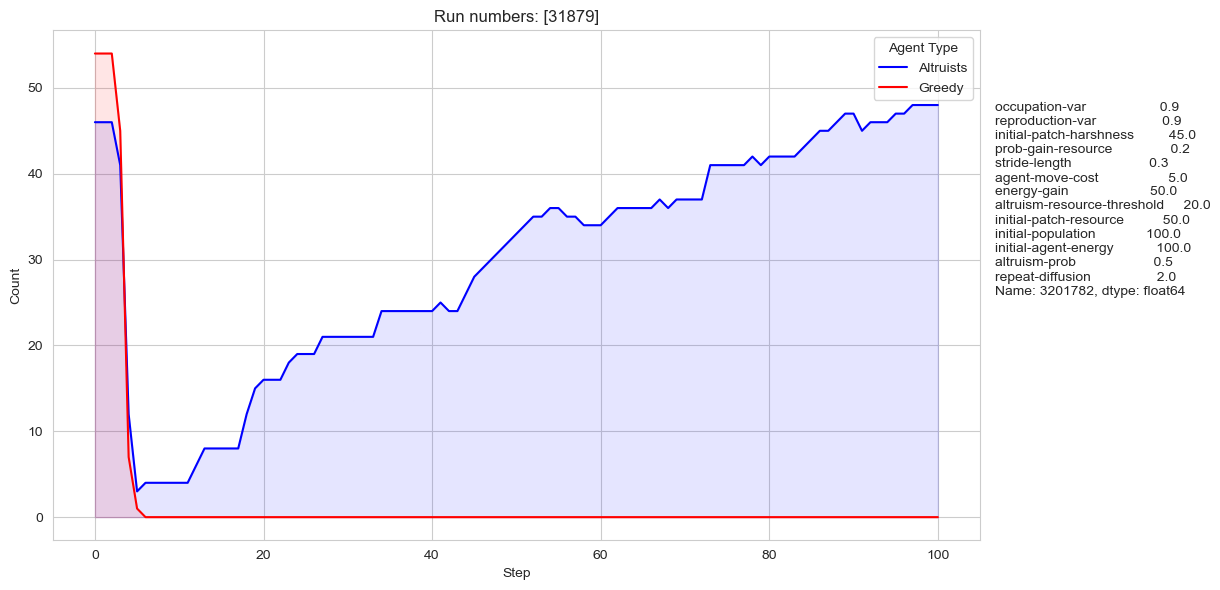

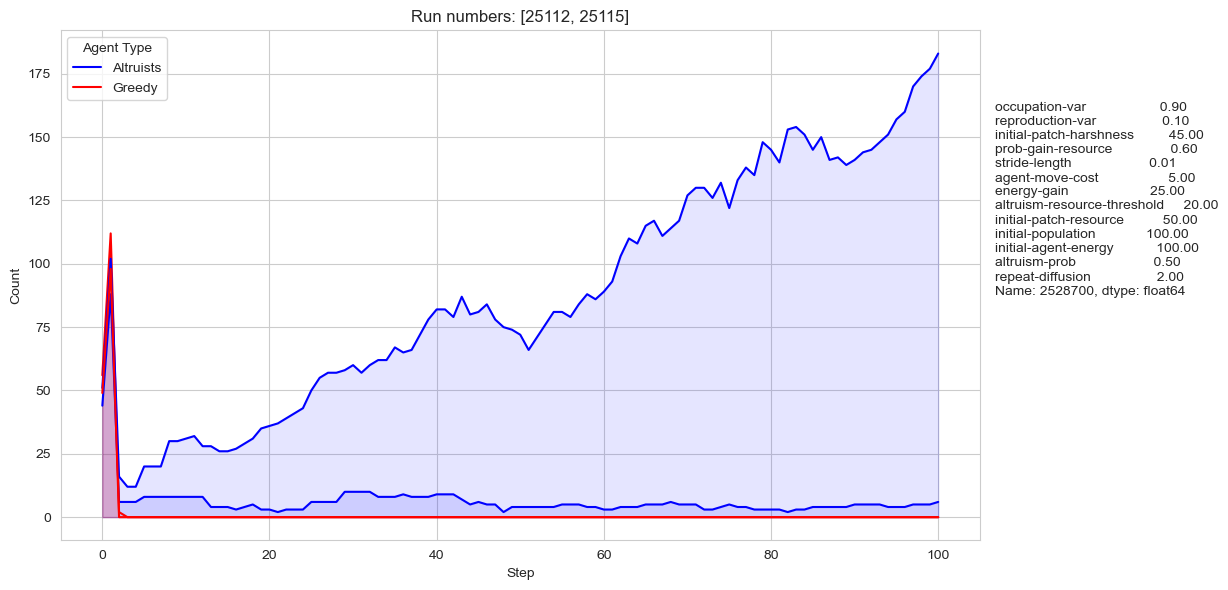

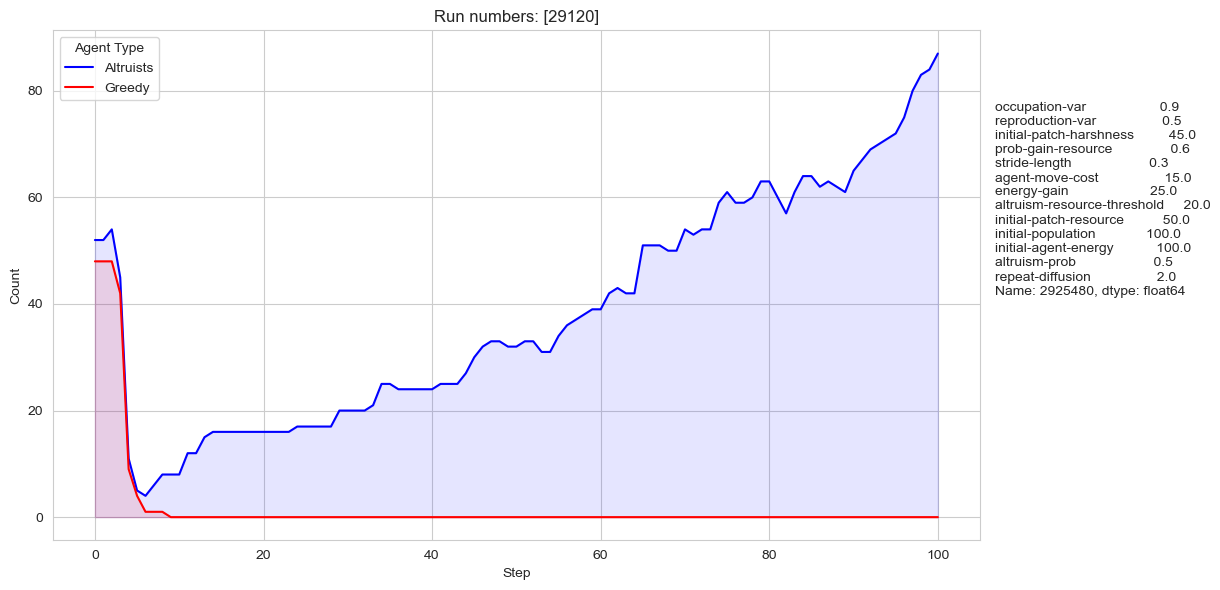

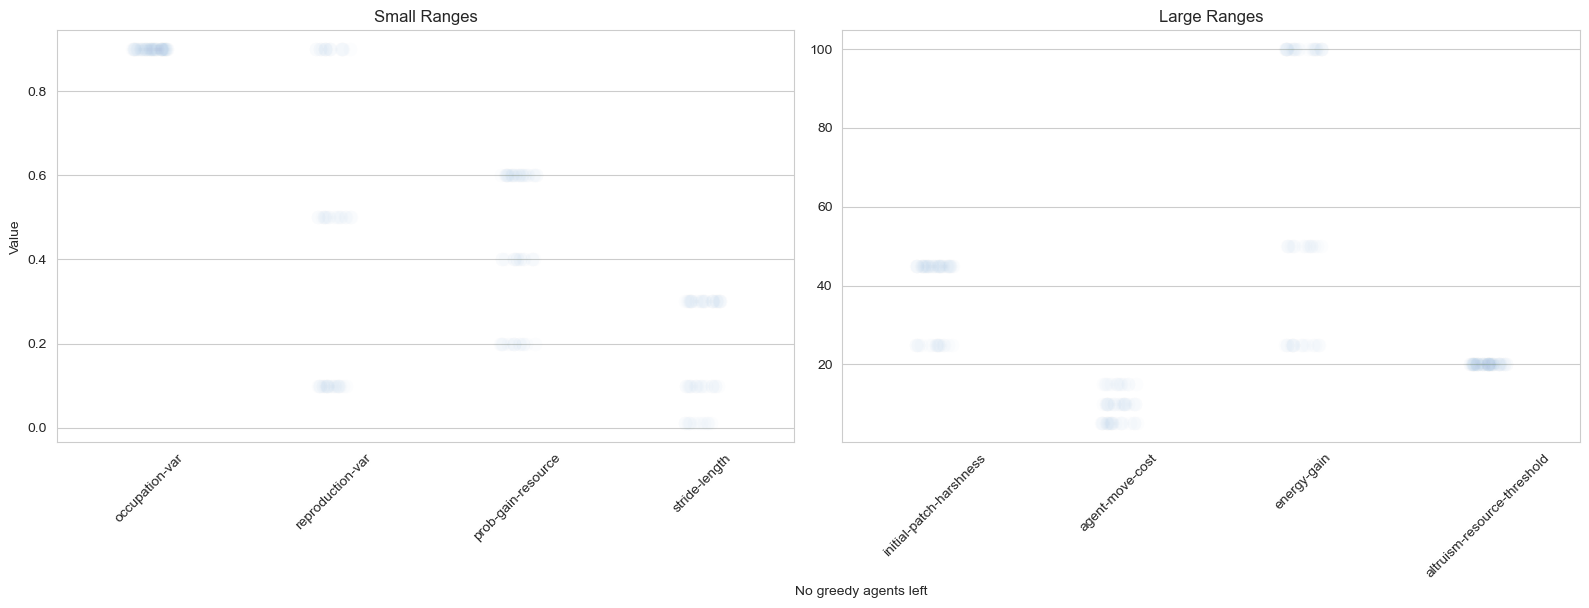

In [34]:
exp_no_greedy = exp[exp['count greedy-agents'] == 0]
exp_full_no_greedy = exp_full[exp_full['run-number'].isin(exp_no_greedy['run-number'])]
print('Number of runs with no greedy agents', len(exp_no_greedy))
plot_random_experiment(exp_full_no_greedy) 
box_plots(exp_no_greedy, 'No greedy agents left')

#### Altruists survive

Number of runs with surviving altruists: 10823


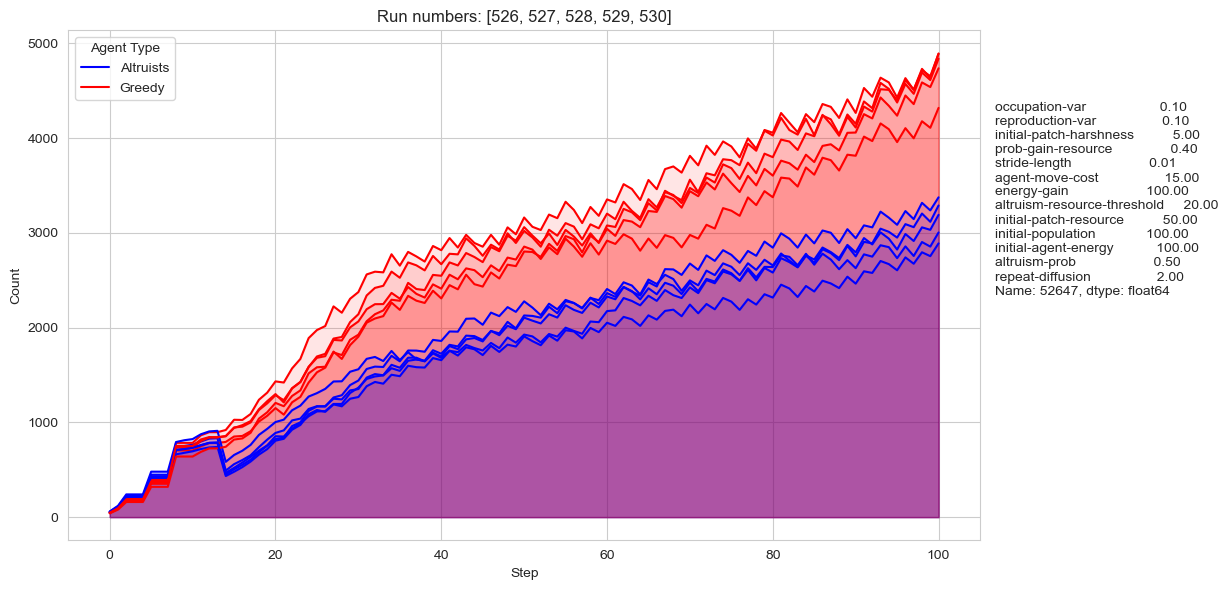

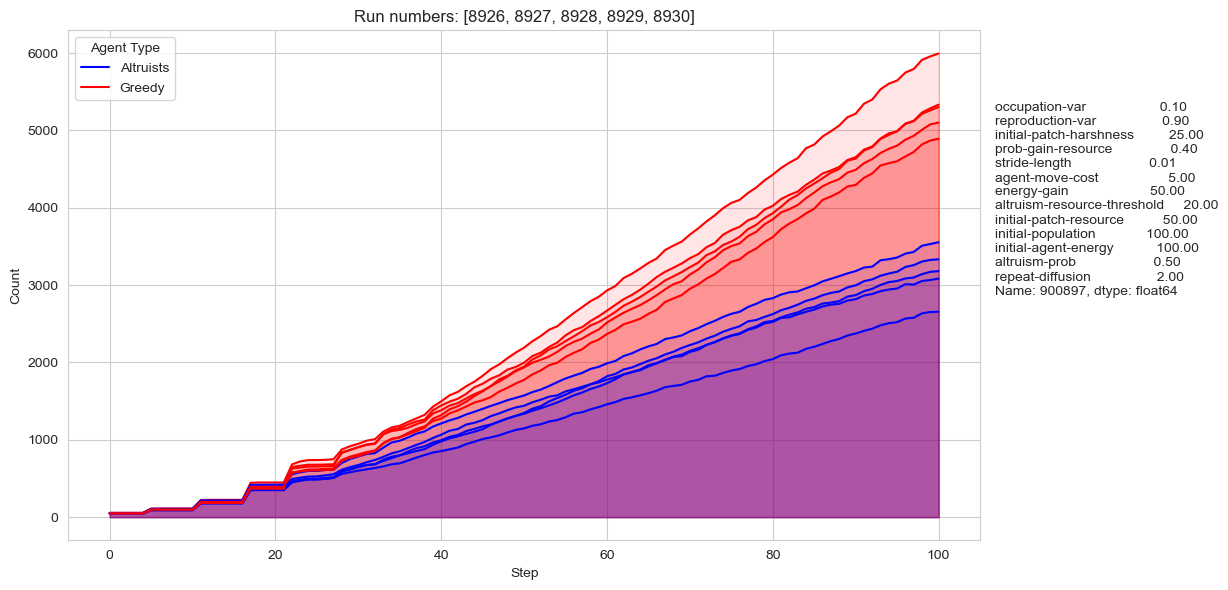

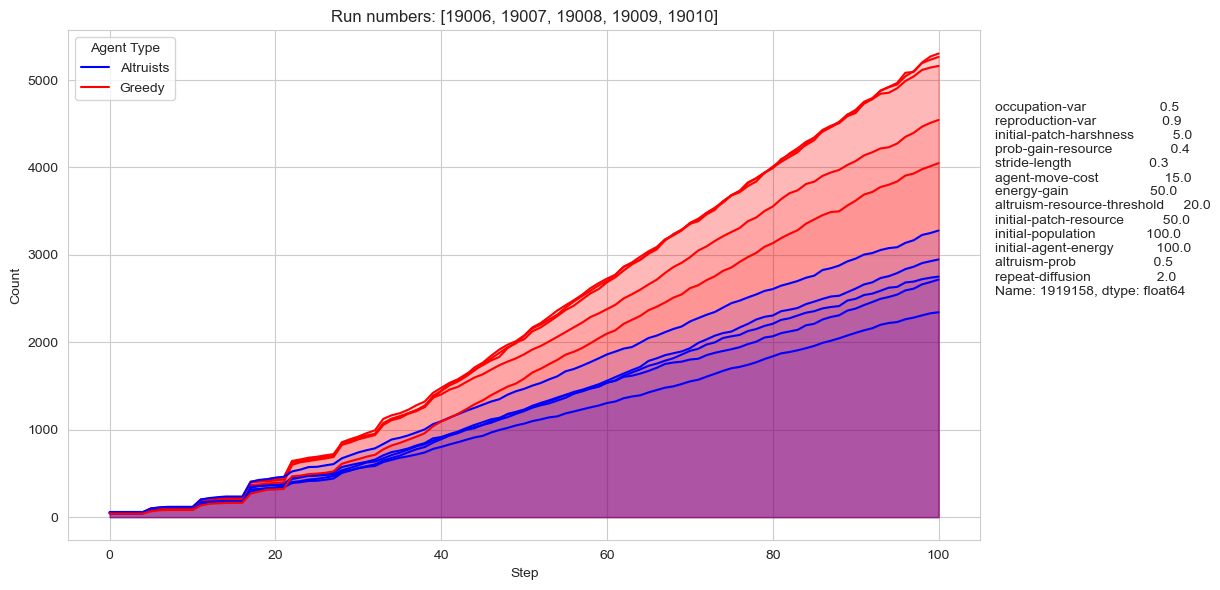

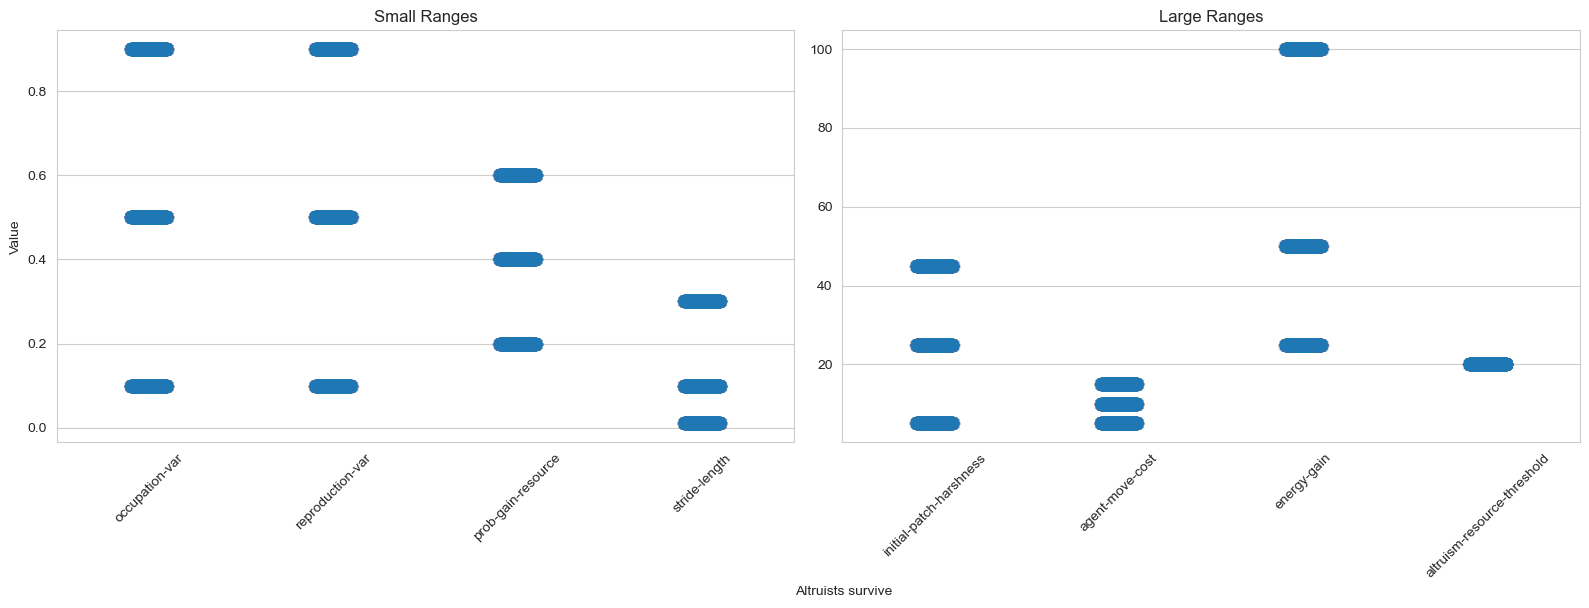

In [35]:
exp_altruists_survive = exp[exp['count altruism-agents'] > 0]
exp_full_alruists_survive = exp_full[exp_full['run-number'].isin(exp_altruists_survive['run-number'])]
print('Number of runs with surviving altruists:', len(exp_altruists_survive))
plot_random_experiment(exp_full_alruists_survive)
box_plots(exp_altruists_survive, 'Altruists survive')

### More altruists than greedy agents

Number of runs with surviving altruists: 483


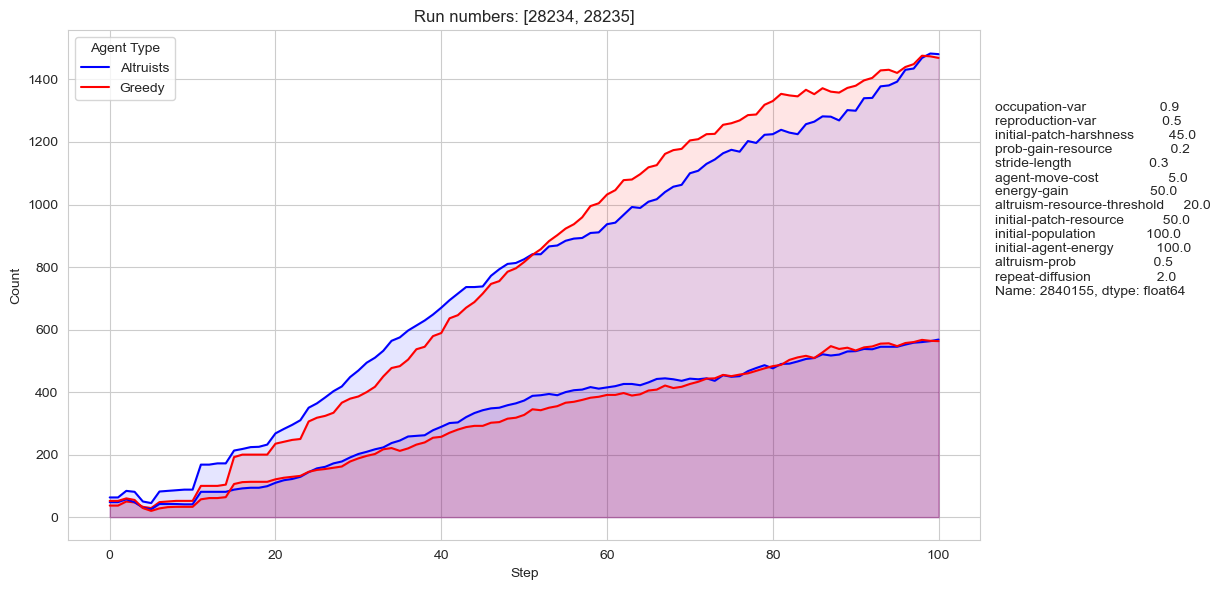

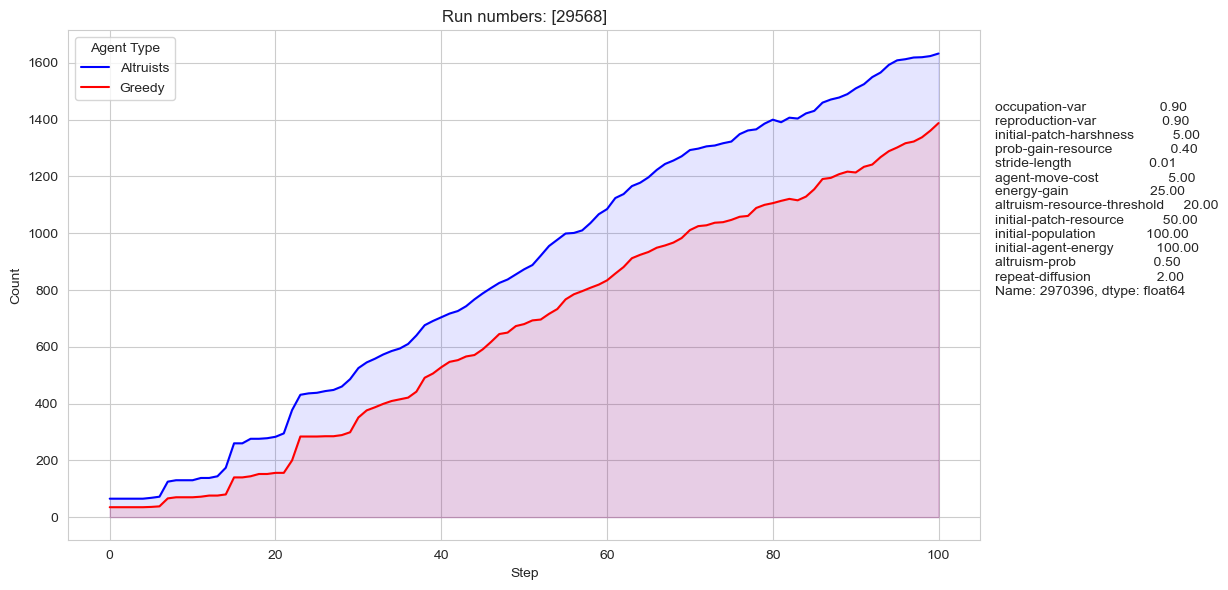

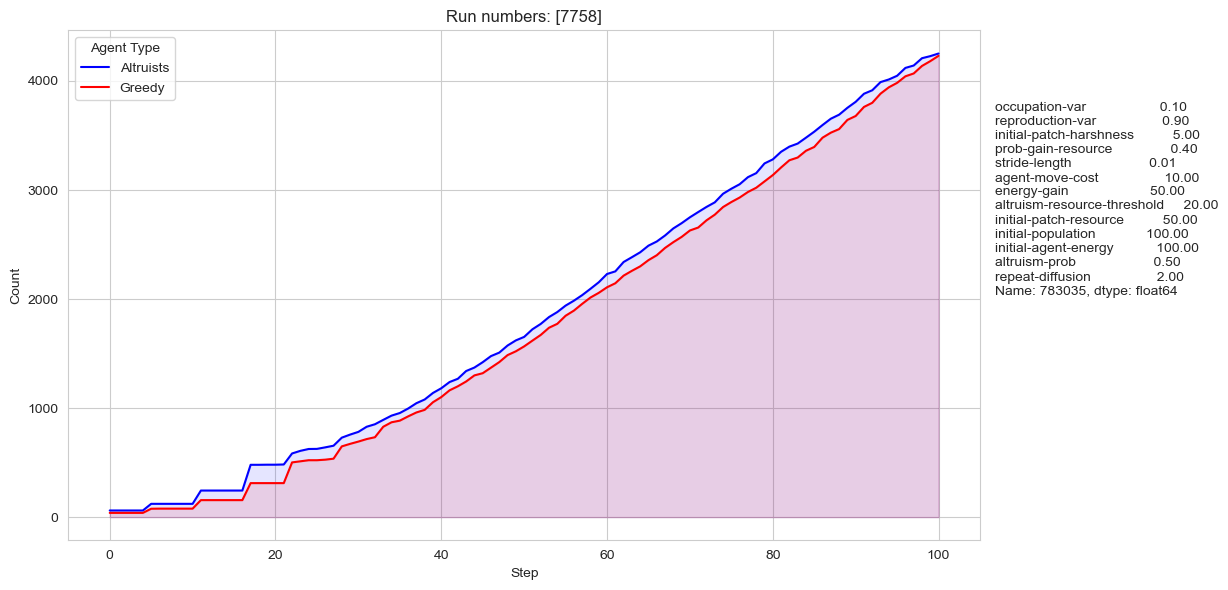

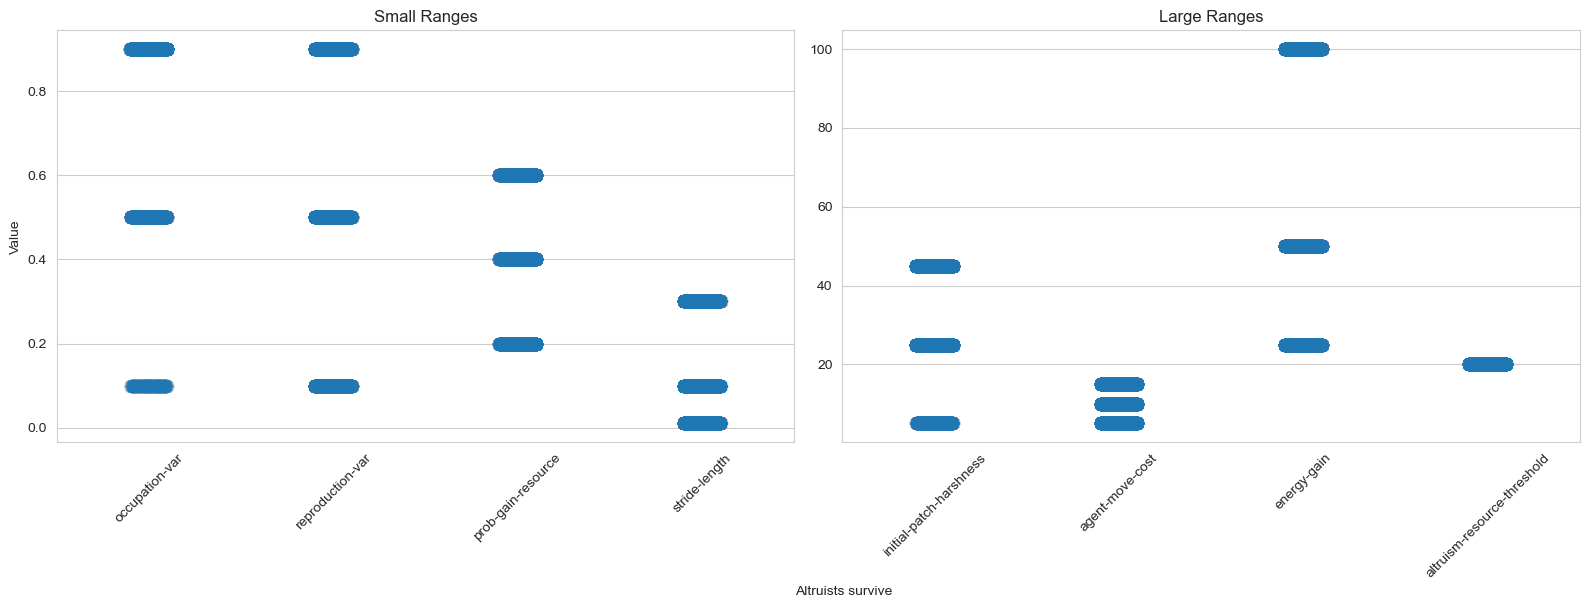

In [36]:
exp_more_altruists = exp[exp['count altruism-agents'] > exp['count greedy-agents']]
exp_full_more_altruists = exp_full[exp_full['run-number'].isin(exp_more_altruists['run-number'])]
print('Number of runs with surviving altruists:', len(exp_more_altruists))
plot_random_experiment(exp_full_more_altruists)
box_plots(exp_full_more_altruists, 'Altruists survive')